In [3]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import pytz

In [4]:
#Loading Dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
#Train Data
train

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [6]:
#Test Data
test

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,152,32,17310,Seafood Lasagna,sp_aUSaElGf_17310_c_310012,u_1oKYP0QIv00q3K9Z5U0TosT5gYx,jsantullo,1,1622717899,0,0,0,100,This is an absolutely wonderful seafood recipe...
4542,121,74,26937,Pineapple Pudding Cake,sp_aUSaElGf_26937_c_331905,u_1oKVlhuSfIH4M8gwWLvmkvs3215,homeoftaste,1,1622717990,0,0,0,100,This us a definite &#34;OMG&#34;. Tastes sinf...
4543,133,73,41095,Contest-Winning New England Clam Chowder,sp_aUSaElGf_41095_c_112060,u_1oKVb3oC9QR5uDI8OqeaPncMtBe,cmfisher,1,1622716903,0,0,0,100,absolutely great....even husband and grandson ...
4544,91,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_391682,u_1oKcs7T7xAY63ZrRKCwH8ccshww,danalu8,1,1622718289,0,0,1,100,I followed directions. It tastes very bland. V...


# **- Handling Null Values**

In [7]:
#Null Values Count
print("Null Values in train : ")
print(train.isna().sum())

print()

print("Null Values in test : ")
print(test.isna().sum())


Null Values in train : 
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

Null Values in test : 
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64


**- Here, train data has 2 null values in Recipe Column. In Comparision with the shape of the dataset this is relatively very small number, so we can drop the rows with null values.**

In [8]:
#Dropping rows with null values
train.dropna(inplace=True)
test.dropna(inplace=True)

# **-ID**

In [9]:
train["ID"]

0         70
1         72
2        458
3          7
4         60
        ... 
13631    115
13632    372
13633     87
13634     48
13635    379
Name: ID, Length: 13634, dtype: int64

**-ID column is an unique identifier, so dropping it.**

In [10]:
#Dropping ID column 
train.drop("ID",axis=1,inplace=True)
test.drop("ID",axis=1,inplace=True)

In [11]:
#Splitting train data into Training and Validation 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train.drop("Rating",axis=1),train["Rating"],test_size=0.2,random_state=24)

In [12]:
##DUMMY CLASSIFIER
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
model = DummyClassifier(strategy="most_frequent").fit(x_train,y_train)
pred = model.predict(x_test)
print("Acurracy of dummy classifier is : ",accuracy_score(y_test,pred))

Acurracy of dummy classifier is :  0.768976897689769


In [13]:
#Splitted train data
x_train

,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
5018,21,33206,Pineapple Orange Cake,sp_aUSaElGf_33206_c_124666,u_1oKVqTlYloOP2wW12dhuvtdJpqE,santiago1,1,1622716963,0,0,0,100,Delicious and oh so easy to make. I added coc...
10361,8,6086,Apple Pie,sp_aUSaElGf_6086_c_1v9JAZzGYQT5ysHq2RpfNHx1htg,u_eWsFCn6YwTvq,Rebekah921,1,1625968236,0,11,4,722,Delicious! Used 9 large apples and doubled the...
8106,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_405377,u_1oKX1q1f1QiFOxCPF85F6u185Yq,la210,1,1622718356,0,0,0,100,"Made this soup yesterday, added green chili so..."
3968,18,2872,Stuffed Pepper Soup,sp_aUSaElGf_2872_c_407548,u_1oKcLNXpH8OVpJlnb6rcTmwU57v,Guest7245,1,1622718398,0,0,0,100,My whole family loves this soup! Easy to put t...
4064,16,41101,Rustic Italian Tortellini Soup,sp_aUSaElGf_41101_c_24OQpheBhL8zouWS8Yk4CX7G2xB,u_MJmOeIR3aOHU,acgmellor,1,1643499338,0,4,5,576,We love this recipe! Even my very picky teena...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,83,9735,Comforting Chicken Noodle Soup,sp_aUSaElGf_9735_c_416777,u_1oKWwrydkHlyEIosk1KrRg4aH1X,BellaTerra66,1,1622718441,0,4,2,235,This is a keeper! because we can do so much wi...
3474,25,23222,Baked Mushroom Chicken,sp_aUSaElGf_23222_c_124206,u_1oKWDLmYDQVVTB3t8iGoO3tOChZ,alisonwolber,1,1622716946,0,0,0,100,Delicious !!! - just follow the recipe
8536,43,33457,Chunky Apple Cake,sp_aUSaElGf_33457_c_191728,u_1oKXh71mDxLm0I0fNpH73GtDyqB,spoiled2u2,1,1622717300,0,1,0,193,i made this cake for a nursing home fall festi...
899,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_227169,u_1oKW7JkYzhweykkO6keOmaquyai,suefetzer,1,1622717477,0,0,0,100,"it was very good, i cut recipe in half as ther..."


In [14]:
#Splitted train data
x_test

,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
10390,23,14600,Buttery Cornbread,sp_aUSaElGf_14600_c_175012,u_1oKXAlKlRmigadMaj4NgV13PMQq,kevlis,1,1622717191,0,0,0,100,I have made this cornbread several times. My f...
9297,28,12734,Cheesy Ham Chowder,sp_aUSaElGf_12734_c_400637,u_1oKcxEyvVKjDEZDgAQ0JLM9To6A,JustBama,1,1622718338,0,0,0,100,I&#39;ve been making this for a couple of year...
7181,33,32535,Creamy Grape Salad,sp_aUSaElGf_32535_c_302578,u_1oKW5eiVHjAqOBkpZmYDEQojpN5,42.rmarshall,1,1622717858,0,0,0,100,This dish received rave reviews at a graduatio...
10524,19,1693,Moist Chocolate Cake,sp_aUSaElGf_1693_c_111039,u_1oKVeWZKcUYHDAAdmzPzaDpjiUb,bwilkin,1,1622716901,0,0,0,100,"Absolutel;y delicious!!! Very moist, great fl..."
1163,58,32248,Smothered Chicken Breasts,sp_aUSaElGf_32248_c_416970,u_1oKdDcUYcdRwH6KDJzjCuh8JWsc,Guest1733,1,1622718417,0,2,1,193,This is a very easy and tasty. The only change...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,26,386,Hot Milk Cake,sp_aUSaElGf_386_c_425954,u_1oKcErDEtdNocsO2YMRi5C02tSO,KeyshaCostley,1,1622718454,0,4,0,329,Well I made the recipe tonight. Nice basic ing...
1437,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_202307,u_1oKWMVbsweTe3eZD6YyfAqOs5bB,snmckey,1,1622717338,0,0,0,100,I often make this bread - it is so yummy. As i...
4128,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_363365,u_1oKVaykAo3s1i5vE78Zf15Z6Wk4,Ruffshse,1,1622718147,0,0,0,100,We just love this bread.
4996,58,32248,Smothered Chicken Breasts,sp_aUSaElGf_32248_c_248903,u_1oKYNT6xsT2MRJMqibNjAymXvXg,goodram,1,1622717543,0,0,1,100,"My family loved it, including my husband, who ..."


In [15]:
#Descriptive Statistics Of Train Data
x_train.describe()

,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
count,10907.000000,10907.000000,10907.000000,1.090700e+04,10907.000000,10907.000000,10907.000000,10907.000000
mean,38.565142,21611.143761,2.102778,1.623688e+09,0.014303,1.112405,0.542129,153.280004
std,29.630320,23368.421214,9.206745,5.333806e+06,0.138688,4.236284,3.338743,141.208509
min,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000
25%,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,100.000000
50%,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
75%,63.000000,32535.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
max,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,934.000000


**- Most of the users has reputation of 1 and most of the comments has score of 100 futhermore, most of the comments are there with no reply, no likes and no dislikes.**

<Axes: >

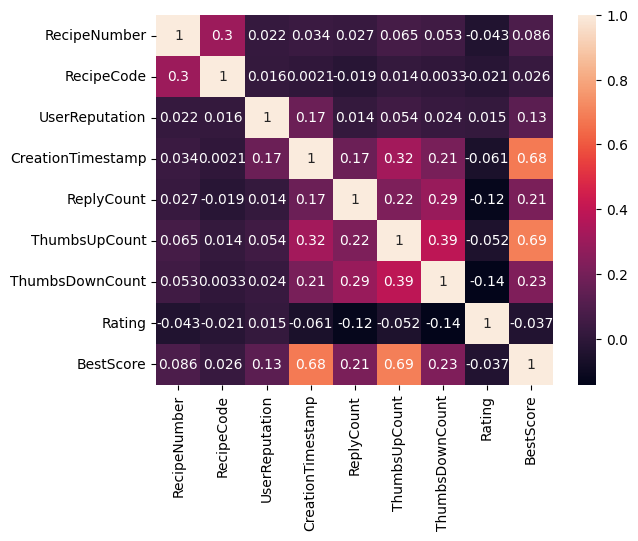

In [16]:
#CORRELATION MATRIX
sns.heatmap(train.select_dtypes(exclude="object").corr(),annot=True)

# **- CreationTimeStamp**

In [17]:
#Function to return month
def month(s):
    dt = datetime.datetime.fromtimestamp(s,tz =pytz.utc)
    return dt.month

#Function to return day
def day(s):
    dt = datetime.datetime.fromtimestamp(s,tz =pytz.utc)
    return dt.day

#Processing CreationTimeStamp
x_train["Month"] = x_train["CreationTimestamp"].apply(month)
x_train["Day"] = x_train["CreationTimestamp"].apply(day)

x_test["Month"] = x_test["CreationTimestamp"].apply(month)
x_test["Day"] = x_test["CreationTimestamp"].apply(day)

test["Month"] = test["CreationTimestamp"].apply(month)
test["Day"] = test["CreationTimestamp"].apply(day)

In [18]:
#Dropping CreationTimestamp
x_train.drop("CreationTimestamp",axis=1,inplace=True)
test.drop("CreationTimestamp",axis=1,inplace=True)
x_test.drop("CreationTimestamp",axis=1,inplace=True)

[Text(0.5, 1.0, 'Month Frequency')]

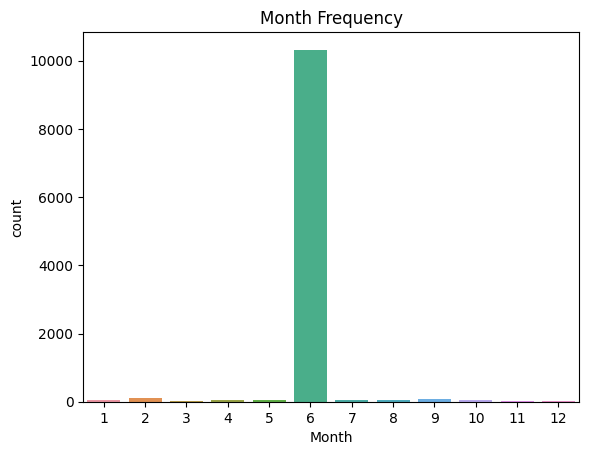

In [19]:
#Month Column
sns.countplot(x="Month",data=x_train).set(title="Month Frequency")

[Text(0.5, 1.0, 'Day Frequency')]

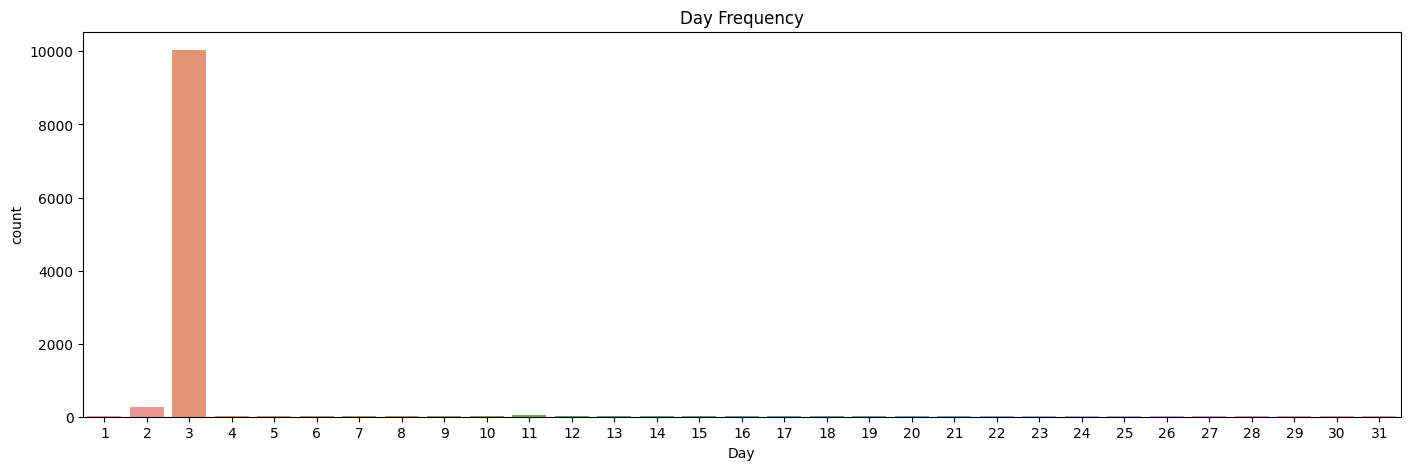

In [24]:
#Day Column
plt.figure(figsize=(17,5))
sns.countplot(x="Day",data=x_train).set(title="Day Frequency")

**- Most of the comments in the dataset are in Month 6th i.e June and mostly on 3rd day of the month.**

# - **Recipe Number**

In [25]:
x_train["RecipeNumber"].value_counts()

RecipeNumber
3     447
1     392
2     279
6     251
9     245
     ... 
91     55
97     49
72     49
56     49
61     15
Name: count, Length: 100, dtype: int64

[Text(0.5, 1.0, 'RecipeNumber Frequency')]

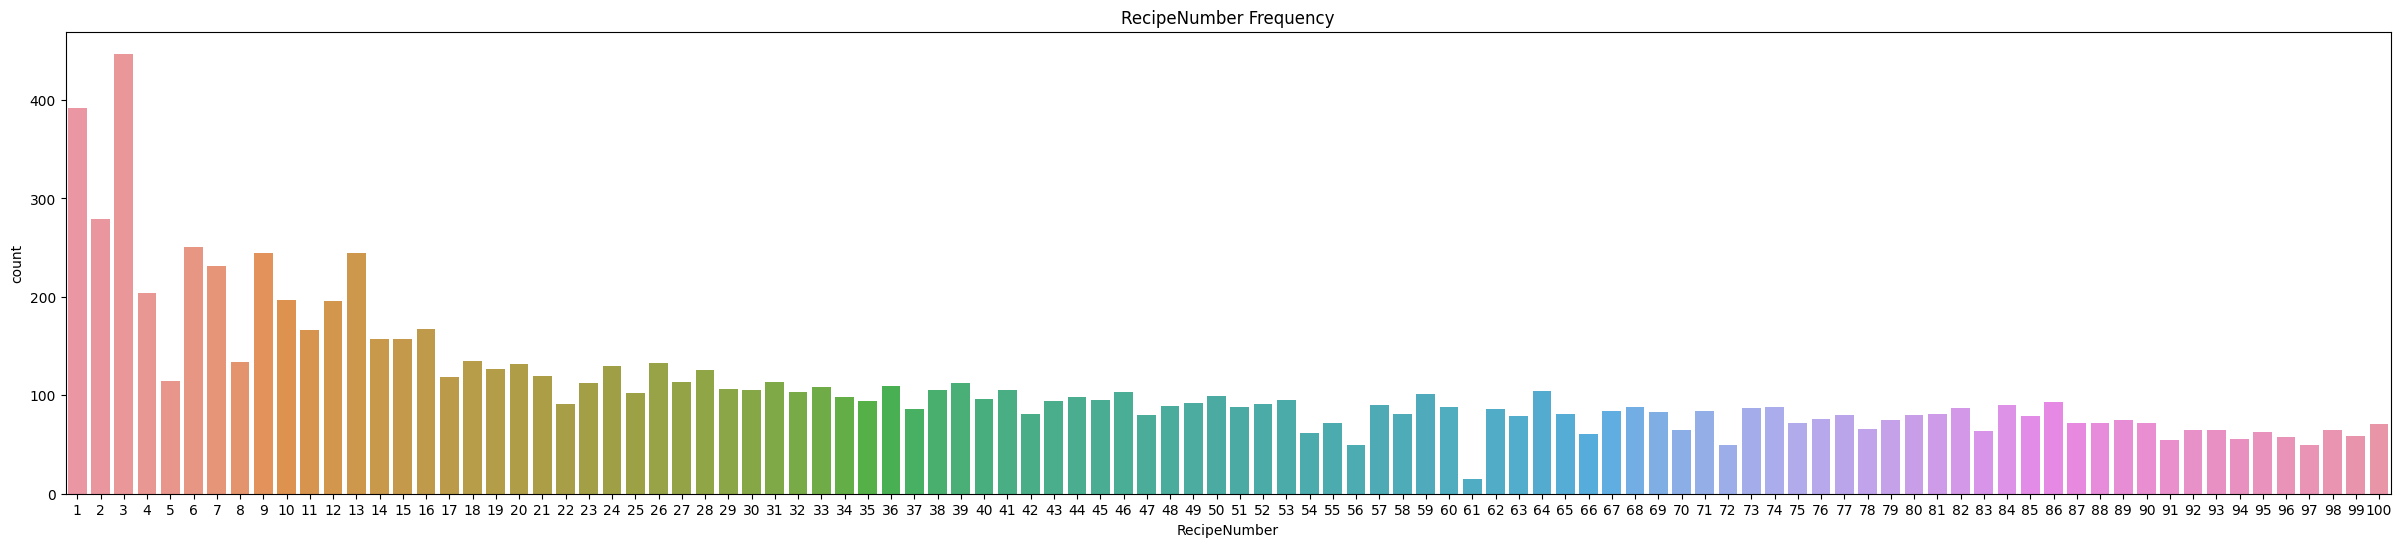

In [26]:
#Plot of Frequency distribution for recipe number
plt.figure(figsize=(30,6))
sns.countplot(x = "RecipeNumber" , data = x_train).set(title = "RecipeNumber Frequency")

**- Most Receipes placed on 1 to 3 out of 100 recipes list**

# **- Recipe Name and RecipeCode**

In [27]:
x_train[["RecipeName","RecipeCode"]].value_counts()

RecipeName                    RecipeCode
Cheeseburger Soup             2832          447
Creamy White Chili            14299         392
Best Ever Banana Bread        3309          279
Favorite Chicken Potpie       21444         251
Basic Homemade Bread          32480         245
                                           ... 
Caramel Heavenlies            3683           55
Peanut Butter Cup Cheesecake  27675          49
Lime Chicken Tacos            34347          49
Blueberry French Toast        1821           49
Vegetarian Linguine           17022          15
Name: count, Length: 100, dtype: int64

**- A "RecipeName" and "RecipeCode" corresponds to same recipe, so one is enough to idenfiy an recipe the other can be drop.**

In [28]:
#Dropping RecipeCode
x_train.drop("RecipeCode",axis=1,inplace=True)
test.drop("RecipeCode",axis=1,inplace=True)
x_test.drop("RecipeCode",axis=1,inplace=True)

# **- CommentID UserID and UserName**

In [29]:
print("Total Comment Id's : ",len(x_train["CommentID"].unique()))
print("Total User Id's : ",len(x_train["UserID"].unique()))
print("Total User Name : ",len(x_train["UserName"].unique()))

Total Comment Id's :  10907
Total User Id's :  8864
Total User Name :  8732


In [30]:
x_train["UserID"].value_counts()

UserID
u_1oKVZzipo1u8lcqQzDUcw4UBn9e    15
u_1oKVZmYPulmUFbvGiBA8U3uRR6D    15
u_1oKVZoIOMWJ2j7TA7py2BIbf1mm    14
u_1oKVZdmUbQTYMVdbXOpVfRQuHm9    14
u_1oKVZayWppErhTC8Zdspk9bGr7q    13
                                 ..
u_X2G91a79Uodm                    1
u_1oKVn6a5koqapbiKMQhsN83B0ad     1
u_1oKaRV5HbouQDvPGlPzUKYInem1     1
u_1oKWtDltygTFp6VpoEiXHT4Vl4G     1
u_1oKc61c1C1d3IkeIauOM56Mq8Px     1
Name: count, Length: 8864, dtype: int64

In [31]:
x_train["UserName"].value_counts()

UserName
2124arizona        18
No_Time_To_Cook    16
mjlouk             15
justmbeth          15
gunslinger         13
                   ..
deboreno            1
mama2many           1
GaitherMom          1
grannygourmet       1
RamonaAgricola      1
Name: count, Length: 8732, dtype: int64

**- CommentID is ID corresponds to every comment and has value count of number of rows present in the dataset which implies the commentID is an unique Identifier.**

**- Just like RecipeName and RecipeCode corresponds to same recipe , UserName and UserID corresponds to same user.**

In [32]:
#Dropping Comment and UserID
x_train.drop(["UserID","CommentID"],axis=1,inplace=True)
test.drop(["UserID","CommentID"],axis=1,inplace=True)
x_test.drop(["UserID","CommentID"],axis=1,inplace=True)

# **- UserReputation**

In [33]:
x_train["UserReputation"].unique()

array([  1,  10,   0,  20,  60,  90,  30,  50, 100,  40,  70,  80, 130,
       150, 220, 510, 110, 140, 160])

In [34]:
x_train["UserReputation"].value_counts()

UserReputation
1      10165
10       376
20       180
0         99
30        43
50        10
40        10
90         4
60         4
80         3
100        2
70         2
510        2
110        2
130        1
150        1
220        1
140        1
160        1
Name: count, dtype: int64

[Text(0.5, 1.0, 'UserReputation Frequency')]

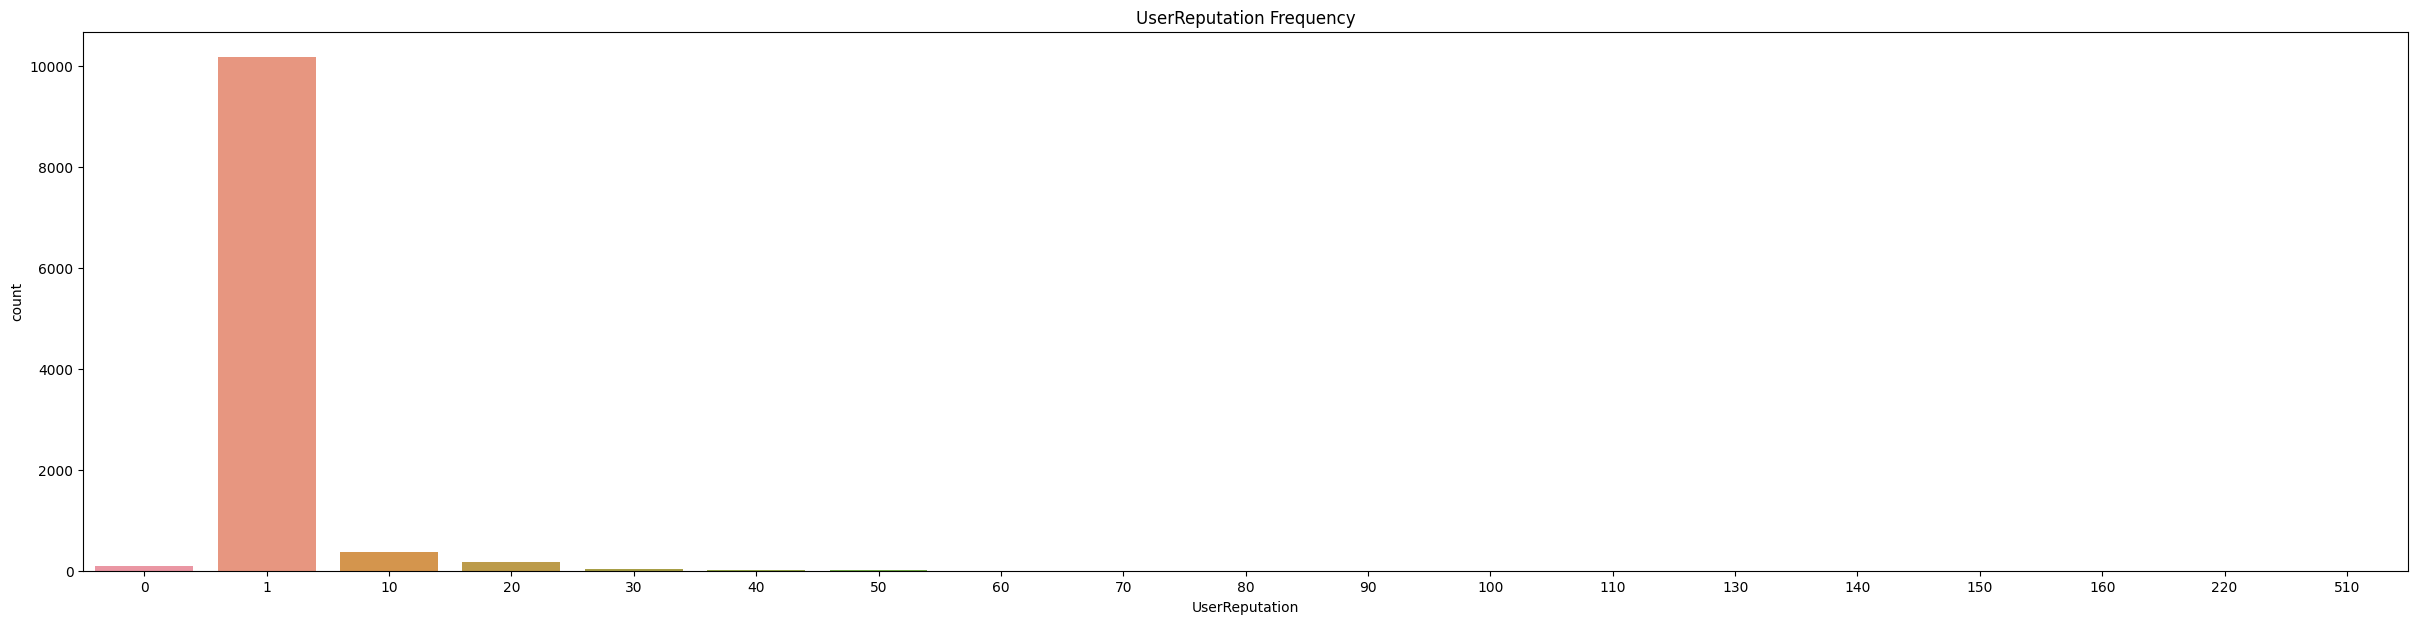

In [35]:
#Plot of Frequency distribution for UserReputation
plt.figure(figsize=(30,7))
sns.countplot(x = "UserReputation" , data = x_train).set(title = "UserReputation Frequency")

In [36]:
print("The skewness of UserReputation is: ",x_train["UserReputation"].skew())

The skewness of UserReputation is:  35.01616105562969


**- UserReputation is highly skewed towards right and most of users has 1 repuation which indicates it also contains outliers.**

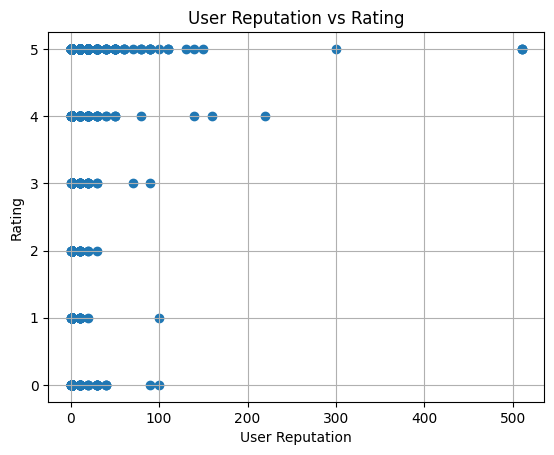

In [37]:
#Plot of UserReputation vs Rating
plt.scatter(train['UserReputation'], train['Rating'])
plt.title('User Reputation vs Rating')
plt.xlabel('User Reputation')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# **- ReplyCount, ThumbUpCount, ThumbsDownCount**

In [38]:
x_train["ReplyCount"].value_counts()

ReplyCount
0    10774
1      115
2       13
3        5
Name: count, dtype: int64

In [39]:
x_train["ThumbsUpCount"].value_counts()

ThumbsUpCount
0     8446
1     1045
2      374
3      225
4      126
6       93
5       88
7       64
8       52
9       47
12      39
13      30
10      30
11      26
15      22
16      22
18      19
17      17
14      16
21      16
20      11
19      10
24       9
23       7
22       7
33       6
25       5
31       5
26       5
27       4
35       4
39       3
42       3
29       2
76       2
57       2
30       2
55       2
45       2
41       2
47       2
36       2
44       1
79       1
43       1
28       1
37       1
48       1
80       1
32       1
73       1
40       1
69       1
46       1
68       1
Name: count, dtype: int64

In [40]:
x_train["ThumbsDownCount"].value_counts()

ThumbsDownCount
0      9460
1       714
2       236
3       118
5        66
4        65
6        39
7        28
10       22
9        21
8        18
11       15
13       14
15       13
12       10
16        8
14        8
21        6
17        5
19        4
31        3
18        3
25        2
30        2
24        2
65        2
22        2
46        1
37        1
55        1
70        1
40        1
62        1
49        1
104       1
32        1
71        1
20        1
23        1
26        1
61        1
78        1
41        1
87        1
39        1
126       1
38        1
27        1
Name: count, dtype: int64

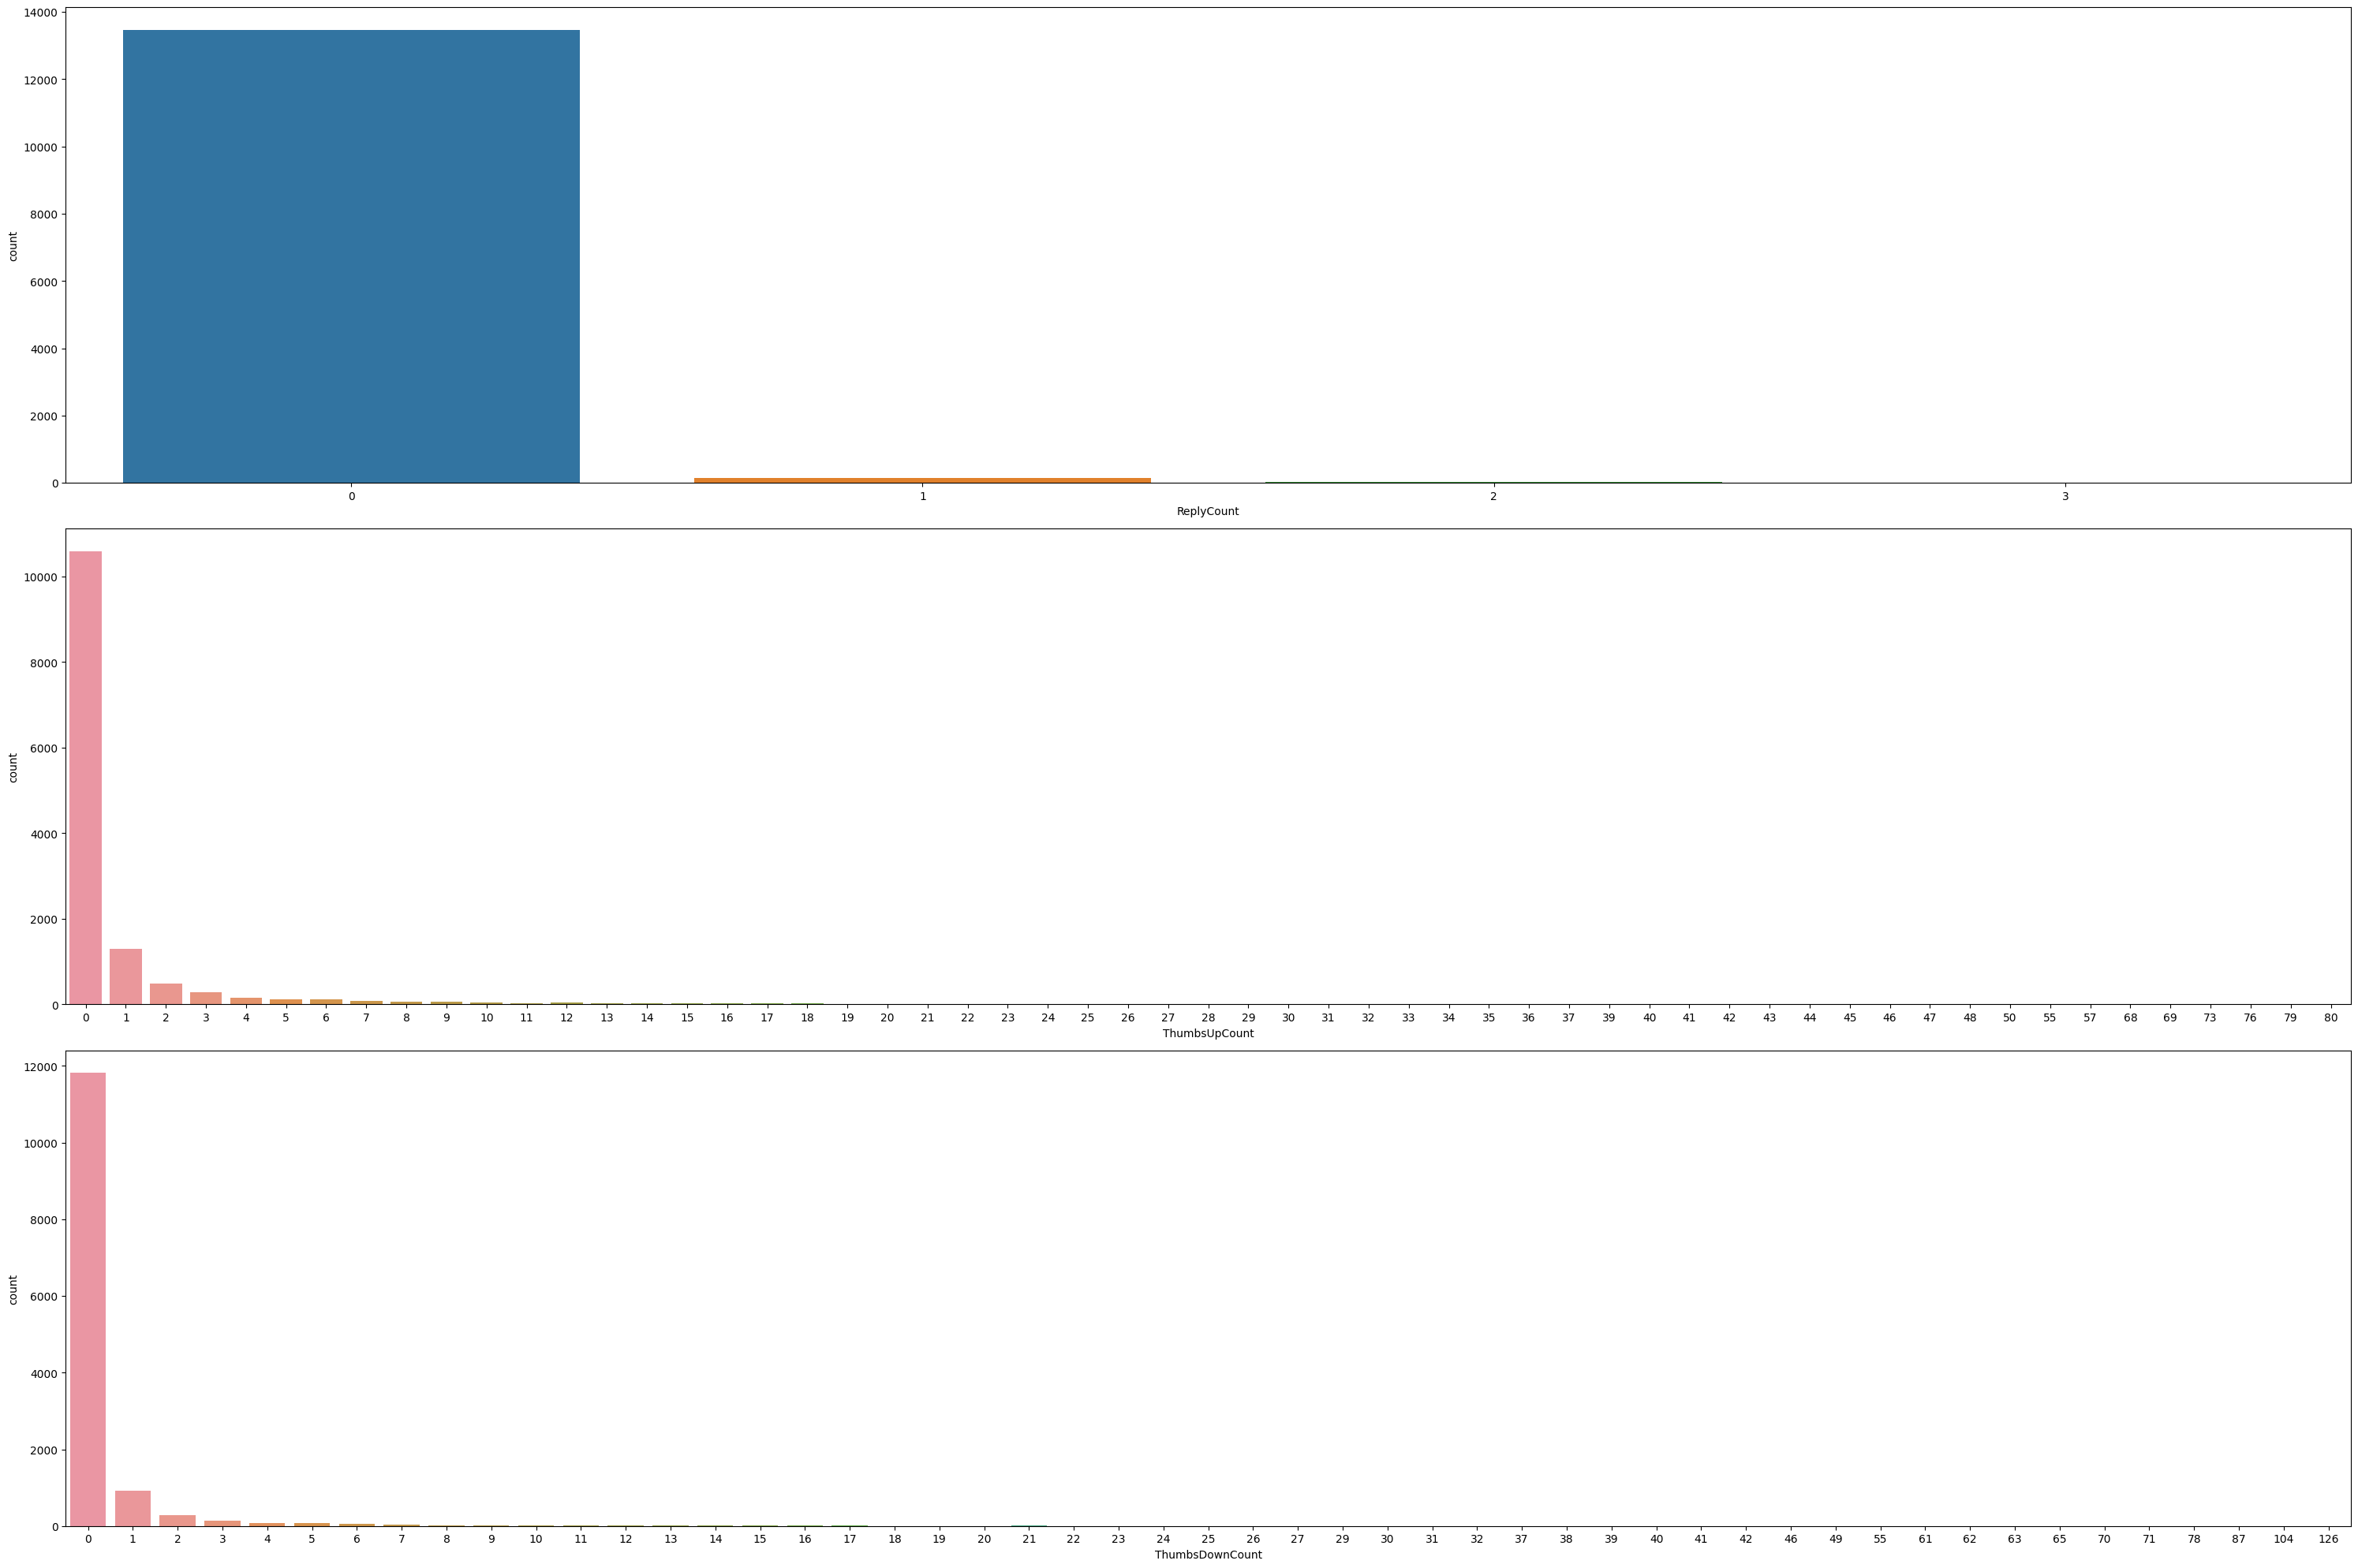

In [41]:
columns = ['ReplyCount','ThumbsUpCount','ThumbsDownCount']
values = [x_train["ReplyCount"],x_train["ThumbsUpCount"],x_train["ThumbsDownCount"]]

# Adjusting FigSize
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

# Plotting Bars
sns.countplot(data=train, x='ReplyCount', ax=axes[0])
sns.countplot(data=train, x='ThumbsUpCount', ax=axes[1])
sns.countplot(data=train, x='ThumbsDownCount', ax=axes[2])

# Show plot
plt.tight_layout()
plt.show()

In [42]:
print("The skewness of ReplyCount, ThumbsUpCount and ThumbsDownCount are : ",train["ReplyCount"].skew(),train["ThumbsUpCount"].skew(),train["ThumbsDownCount"].skew())

The skewness of ReplyCount, ThumbsUpCount and ThumbsDownCount are :  11.407385116759176 7.885575652364369 16.658904581404887


**- ReplyCount, ThumbsUpCount, ThumbsDownCount all three has peak at starting and decreases drastically (exponentially) and all three are highly skewed towards right.**

**-"ThumbsUpCount", "ReplyCount", "ThumbsDownCount" tells the number of reply, likes and dislikes an comment received, which can be generalize to find the interest which users are showing in that comment.**
**For example : if an user is liking an comment it indicates he/she is interested in that comment and same goes with reply and if an user is disliking an comment it indicates he/she is not interested in that comment.**

In [43]:
#Fuction to create Interest column
def interest(data):
  data["Interest"] = data["ThumbsUpCount"] + data["ReplyCount"] - data["ThumbsDownCount"]
  data.drop(["ThumbsUpCount","ReplyCount","ThumbsDownCount"],axis=1,inplace=True)
  return data

x_train = interest(x_train)
test = interest(test)
x_test = interest(x_test)

In [44]:
#Unique Values in Interest
x_train["Interest"].unique()

array([   0,    7,   -1,    1,    6,    4,   -3,   11,    3,    2,   -8,
         14,   -7,   -4,   -2,  -10,    5,   -9,    9,    8,   -5,   13,
         -6,   16,   10,   12,   18,   21,   15,   41,   28,   20,   34,
         67,  -73,  -16,   32,   42,  -22,   60, -121,   27,   17,  -17,
        -11,   50,   36,   26,  -26,  -32,   22,   40,  -24,  -13,  -67,
        -15,   35,  -54,  -23,   19,   68,  -20,   29,  -49,  -39,  -28,
        -52,   75,   31,   25,   23,   24,  -19,   39,  -34,  -14,   43,
        -89,   49,   53,  -58])

In [45]:
print("The skewness of Interest is: ",x_train["Interest"].skew())

The skewness of Interest is:  -0.1745402366928804


[Text(0.5, 1.0, 'Interest Frequency')]

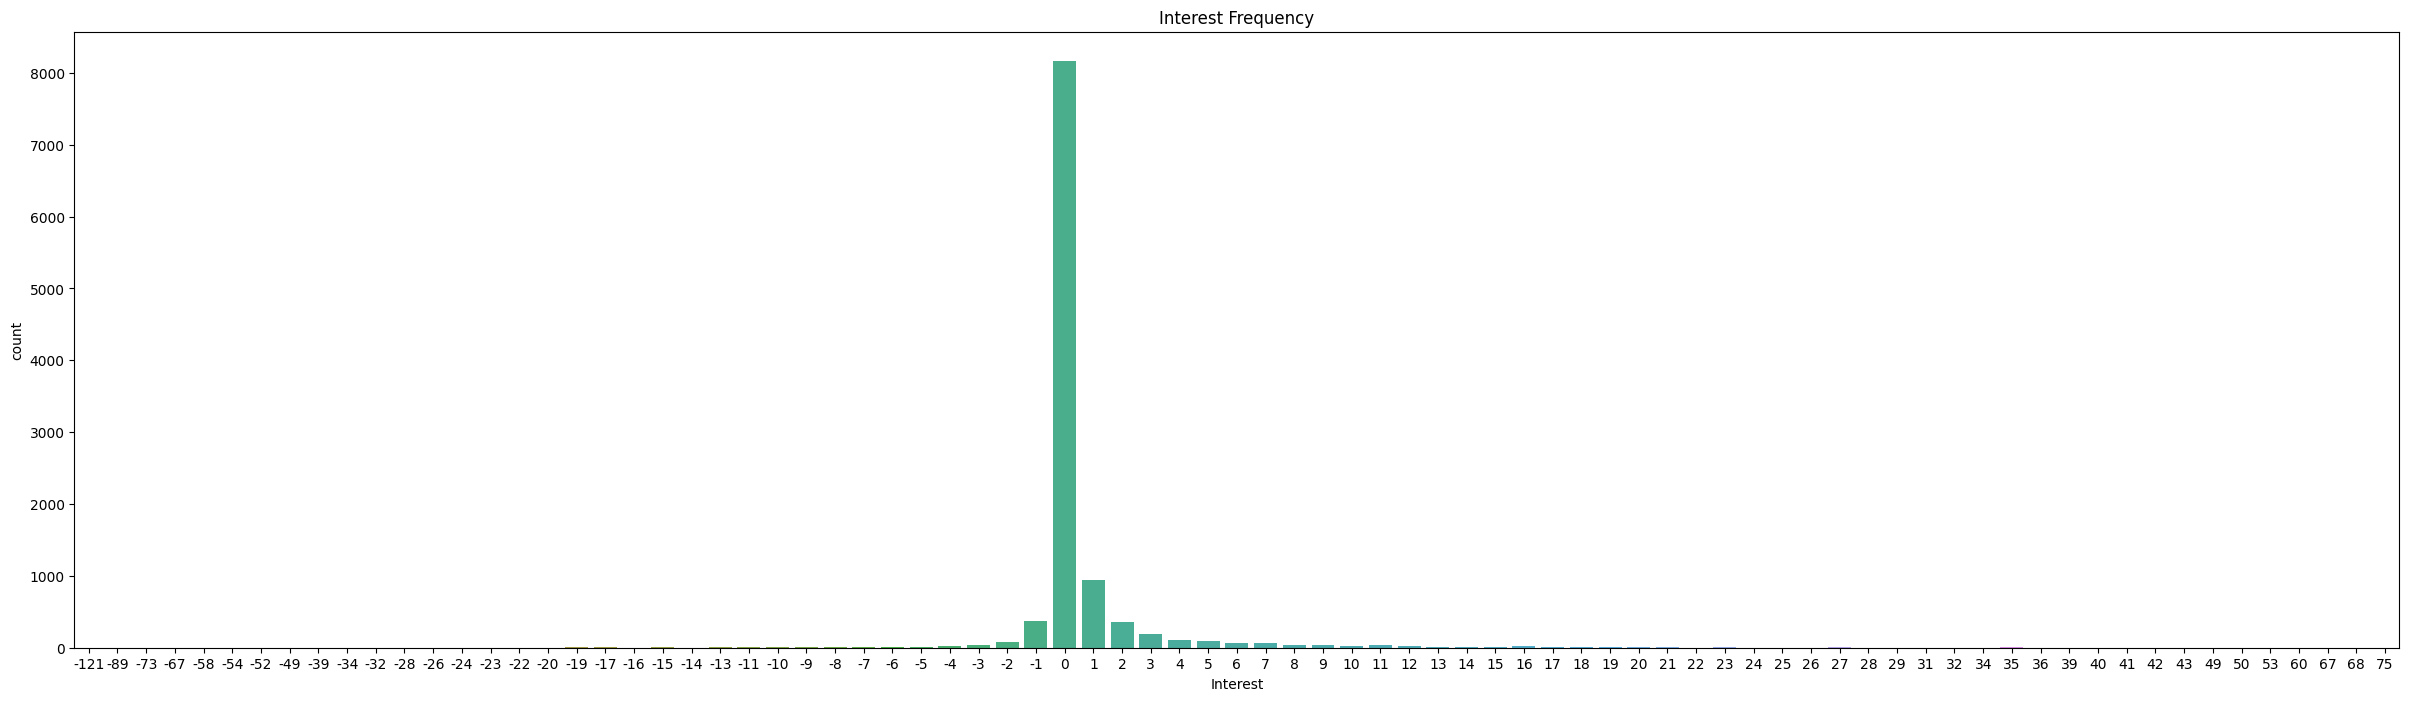

In [46]:
#Plot of Frequency distribution for Interest
plt.figure(figsize=(30,8))
sns.countplot(x = "Interest" , data = x_train).set(title = "Interest Frequency")

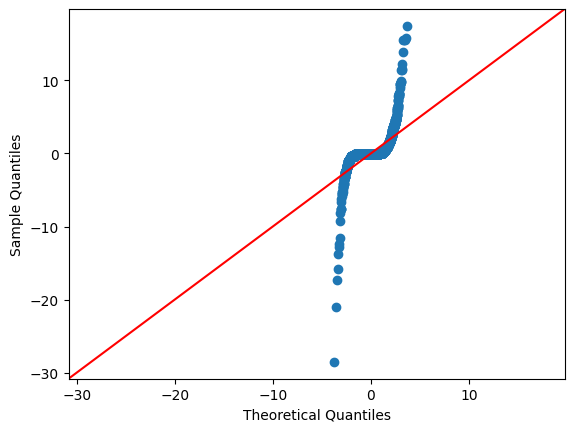

In [47]:
#Checking if follows normal distribution

#importing 
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

#Plotting qqplot
qqplot(x_train["Interest"], stats.norm,fit = True , line = '45')
plt.show()

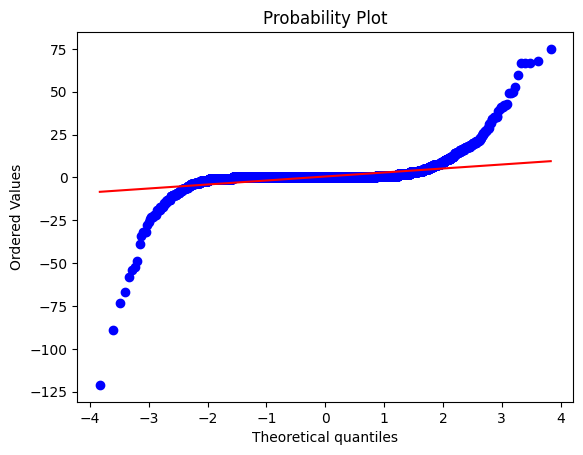

In [48]:
#Plotting pplot
stats.probplot(x_train["Interest"] , dist = "norm" ,  plot=plt)
plt.show()

**- QQplot amplifies the difference between the tail of column's distribution and Expected distribution here can see that the tail of column doesn't follow normal distribution.**

**- PPplot amplifies the difference between the middle portion of column's distribution and Expected distribution here the column somewhat is following the normal distribution.**

**- Interest has negative skewnesss which indicates it's left skewed and it doesn't follows normal distribution and has higher peak at the center**

# **-Processing Categorical Columns**

In [42]:
#Function to remove all characters except alphabets
def process(s):
    # regex which select all alphabets
    s = re.sub('[^a-zA-Z]'," ",s)
    
    #Removing all words with length less than equal to 3
    for i in s.split(" "):
        if(len(i)<=3):
            change =r'\b' + i + r'\b'
            s = re.sub(change,"",s)
    
    # converting the text to lower case
    return s.lower()

In [43]:
#Preprocess Recipe Review 
x_train["Recipe_Review"] = x_train["Recipe_Review"].apply(process)
test["Recipe_Review"] = test["Recipe_Review"].apply(process)
x_test["Recipe_Review"] = x_test["Recipe_Review"].apply(process)

In [44]:
#import Tf-idf vectorizer,countvectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#Object of CountVectorizer
countvec = CountVectorizer() 

#object of Tfidf
tfidf = TfidfVectorizer()

#ColumnTransformer Object 
ct = ColumnTransformer([("countvec1",countvec,"RecipeName"),("countvec2",countvec,"UserName"),("tfidf",tfidf,"Recipe_Review")])
transformed = ct.fit_transform(x_train)
features_name = ct.get_feature_names_out()

#Removing the prefix from columns
selected_features = []
for i in features_name:
    selected_features.append(i.split("__")[1])

#Removing Duplicate Columns and Columns with length less than 3
df = pd.DataFrame(transformed.toarray(), columns=selected_features)
drop = [] #List of columns that to be dropped
value_count = pd.DataFrame(df.columns).value_counts()
for value,count in value_count.items():
    if(count>=2):
        df.drop(value[0],axis=1,inplace=True)
        drop.append(value[0])
    else:
        if(len(value[0])<=3):
            df.drop(value[0],axis=1,inplace=True)
            drop.append(value[0])

#Performing on train data 
x_train = pd.concat([x_train.drop(['RecipeName','UserName','Recipe_Review'],axis=1).reset_index(),df.reset_index()],axis=1).drop("index",axis=1)


#Function to perform on test data
def categorical(data):
    transformed = ct.transform(data)
    df = pd.DataFrame(transformed.toarray(), columns=selected_features)
    df.drop(drop,axis=1,inplace=True)
    return (pd.concat([data.drop(['RecipeName','UserName','Recipe_Review'],axis=1).reset_index(),df.reset_index()],axis=1).drop("index",axis=1))

x_test = categorical(x_test)
test = categorical(test)


In [45]:
#Dataset after processing categorical columns
x_train

,RecipeNumber,UserReputation,BestScore,Month,Day,Interest,01tami,0415,071246lm,10schick,...,ziplocks,zipper,zippy,zips,zoodles,zucchinis,zuchiini,zuchini,zuchinni,zuke
0,21,1,100,6,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,1,722,7,11,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,100,6,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,1,100,6,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,1,576,1,29,-1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,83,1,235,6,3,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10903,25,1,100,6,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10904,43,1,193,6,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10905,63,1,100,6,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **- Rating**

[Text(0.5, 1.0, 'Rating Frequency')]

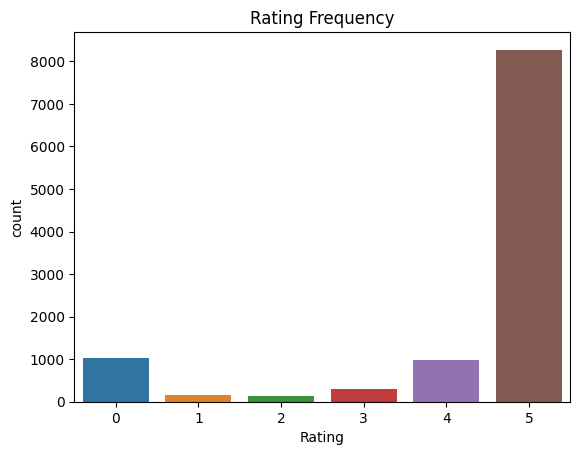

In [46]:
#Plot on Rating Freqeuncy
sns.countplot(x = "Rating" , data = pd.DataFrame(y_train).reset_index()).set(title = "Rating Frequency")

# **Processing Numerical Columns**

- As most of the numerical columns has outliers, scaling them so that they all fall in same range is important, so using MinMaxScaler for that purpose.

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_train[["RecipeNumber","UserReputation","BestScore","Interest","Month","Day"]] = min_max.fit_transform(x_train[["RecipeNumber","UserReputation","BestScore","Interest","Month","Day"]])
x_test[["RecipeNumber","UserReputation","BestScore","Interest","Month","Day"]] = min_max.transform(x_test[["RecipeNumber","UserReputation","BestScore","Interest","Month","Day"]])
test[["RecipeNumber","UserReputation","BestScore","Interest","Month","Day"]] = min_max.transform(test[["RecipeNumber","UserReputation","BestScore","Interest","Month","Day"]])

In [48]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 24)
# x_train,y_train = smote.fit_resample(x_train,y_train)
# x_test,y_test = smote.fit_resample(x_test,y_test)

# **Modelling**

# **- Principal Component Analysis**

Number of components to retain: 4757


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

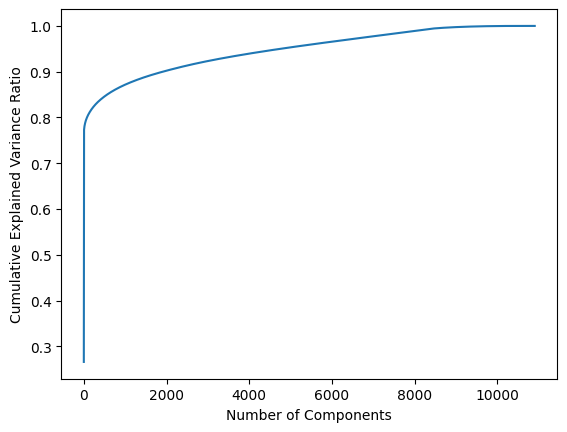

In [49]:
#importing from sklearn
from sklearn.decomposition import PCA

#fitting on train data
pca = PCA()
pca.fit(x_train)

#Setting variance threshold 
threshold = 0.95

#Graph plot between number of components and variance 
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= threshold) + 1
print("Number of components to retain:", num_components)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# **- Logistic Regression**

In [50]:
#importing from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Hypertuining parameters
grid_logistic = GridSearchCV(estimator=LogisticRegression(max_iter=100000),
                   param_grid={"C":[0.01, 0.1, 1,10],
                               "multi_class":["auto", "ovr", "multinomial"],
                               "class_weight":["balanced",None]},
                   scoring="accuracy")

#Calculating accuracy and best parameters 
grid_logistic.fit(x_train,y_train)
print("Test Score is: ",grid_logistic.score(x_test,y_test))
print("Best Parameters: ",grid_logistic.best_params_)

Test Score is:  0.7818115144847818
Best Parameters:  {'C': 1, 'class_weight': None, 'multi_class': 'auto'}


In [51]:
#PCA with logistic regression 
from sklearn.pipeline import Pipeline
pipe_logistic = Pipeline([("pca",PCA(n_components=num_components)),
                 ("logistic",LogisticRegression(max_iter=100000,C=1))])
pipe_logistic.fit(x_train,y_train)

#Accuracy Score
print(accuracy_score(y_test,pipe_logistic.predict(x_test)))

0.7803447011367803


In [52]:
#Classification Report 
from sklearn.metrics import classification_report

print(classification_report(y_test,grid_logistic.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.53      0.09      0.15       236
           1       0.57      0.09      0.16        44
           2       0.00      0.00      0.00        31
           3       0.60      0.05      0.09        63
           4       0.49      0.09      0.16       256
           5       0.79      0.99      0.88      2097

    accuracy                           0.78      2727
   macro avg       0.50      0.22      0.24      2727
weighted avg       0.72      0.78      0.71      2727



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

print("CONFUSION MATRIX : ")
print(confusion_matrix(y_test,grid_logistic.best_estimator_.predict(x_test)))

CONFUSION MATRIX : 
[[  21    0    0    0    2  213]
 [   4    4    0    1    2   33]
 [   3    0    0    1    4   23]
 [   3    3    0    3    8   46]
 [   1    0    0    0   24  231]
 [   8    0    0    0    9 2080]]


# **- RandomForest**

In [54]:
#importing from sklearn
from sklearn.ensemble import RandomForestClassifier

#object of RandomForestClassifier
random_forest = RandomForestClassifier()

#Fitting on train data
random_forest.fit(x_train,y_train)

#Accuracy Score
print(accuracy_score(y_test,random_forest.predict(x_test)))

0.7777777777777778


In [55]:
#PCA with RandomForest
pipe_random_forest = Pipeline([("pca",PCA(n_components=num_components)),
                  ("random_forest",RandomForestClassifier())])
pipe_random_forest.fit(x_train,y_train)

#Accuracy Score
print(accuracy_score(y_test,pipe_random_forest.predict(x_test)))

0.7752108544187752


In [56]:
#Classification Report 
from sklearn.metrics import classification_report

print(classification_report(y_test,random_forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.06      0.12       236
           1       0.83      0.11      0.20        44
           2       0.00      0.00      0.00        31
           3       0.33      0.02      0.03        63
           4       0.75      0.02      0.05       256
           5       0.78      1.00      0.88      2097

    accuracy                           0.78      2727
   macro avg       0.57      0.20      0.21      2727
weighted avg       0.76      0.78      0.69      2727



In [57]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

print("CONFUSION MATRIX : ")
print(confusion_matrix(y_test,random_forest.predict(x_test)))

CONFUSION MATRIX : 
[[  15    0    0    0    0  221]
 [   2    5    0    0    0   37]
 [   0    0    0    2    0   29]
 [   1    1    1    1    1   58]
 [   0    0    0    0    6  250]
 [   2    0    0    0    1 2094]]


# **- KNearestNeighbor**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#KNN Object
knn = KNeighborsClassifier(n_neighbors=150)

#Fitting on train data
knn.fit(x_train,y_train)

#Accuracy Score
print(accuracy_score(y_test,knn.predict(x_test))) 

0.7708104143747708


In [59]:
#PCA with KNN
pipe_KNN = Pipeline([("pca",PCA(n_components=num_components)),
                   ("random_forest",KNeighborsClassifier(n_neighbors=150))])
pipe_KNN.fit(x_train,y_train)

#Accuracy Score
print(accuracy_score(y_test,pipe_KNN.predict(x_test))) 

0.7708104143747708


In [60]:
#Classification Report 
from sklearn.metrics import classification_report

print(classification_report(y_test,knn.predict(x_test),zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       236
           1       0.71      0.11      0.20        44
           2       1.00      0.00      0.00        31
           3       1.00      0.00      0.00        63
           4       1.00      0.00      0.00       256
           5       0.77      1.00      0.87      2097

    accuracy                           0.77      2727
   macro avg       0.91      0.19      0.18      2727
weighted avg       0.82      0.77      0.67      2727



In [61]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

print("CONFUSION MATRIX : ")
print(confusion_matrix(y_test,knn.predict(x_test)))

CONFUSION MATRIX : 
[[   0    0    0    0    0  236]
 [   0    5    0    0    0   39]
 [   0    0    0    0    0   31]
 [   0    2    0    0    0   61]
 [   0    0    0    0    0  256]
 [   0    0    0    0    0 2097]]


# **- Comapring Performance Of Models**

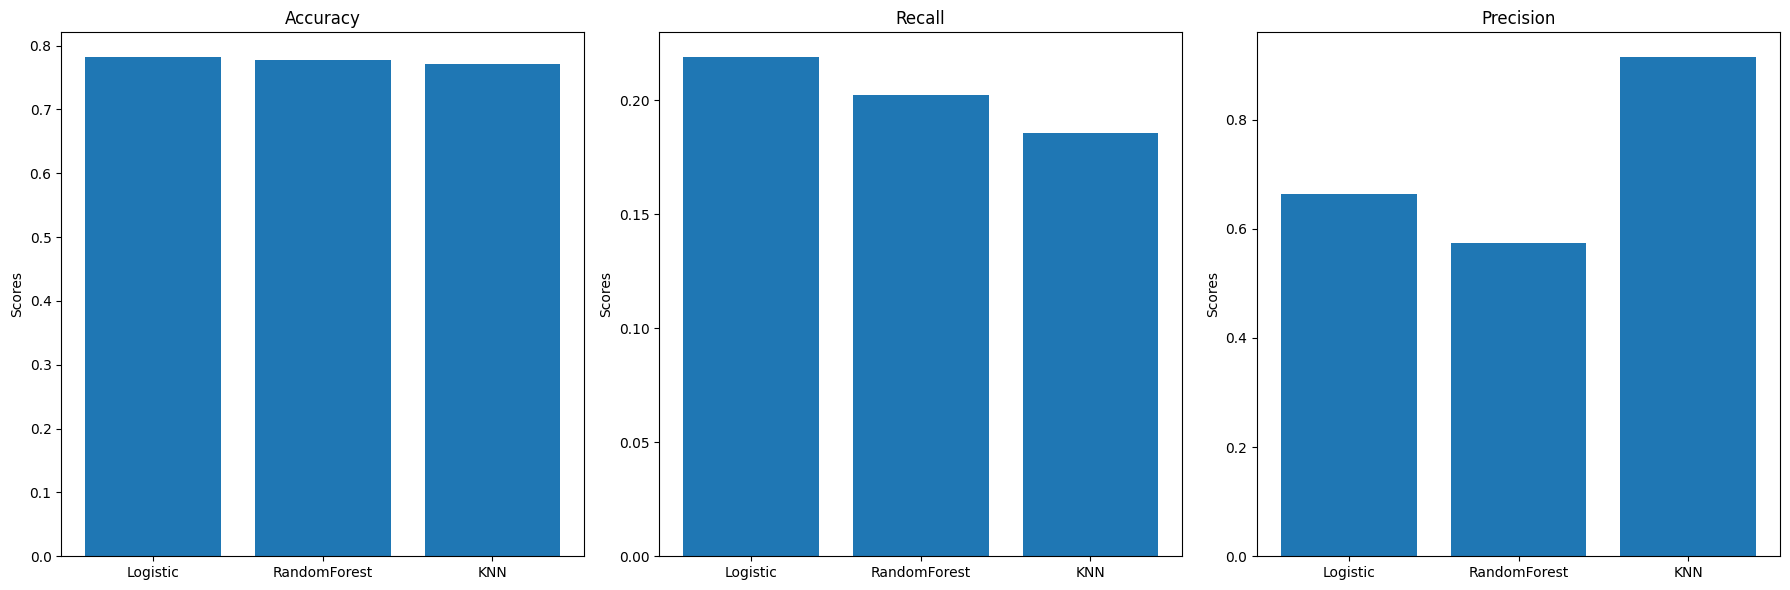

In [64]:
#importing metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score 

#Models with metrics scores
models = ['Logistic', 'RandomForest', 'KNN']
metrics = ['Accuracy', 'Recall', 'Precision']

# Scores
accuracy = [grid_logistic.score(x_test,y_test), accuracy_score(y_test, random_forest.predict(x_test)), accuracy_score(y_test, knn.predict(x_test))]
recall = [recall_score(y_test,grid_logistic.best_estimator_.predict(x_test), average='macro'), recall_score(y_test,random_forest.predict(x_test), average='macro'), recall_score(y_test,knn.predict(x_test), average='macro')]
precision = [precision_score(y_test,grid_logistic.best_estimator_.predict(x_test), average='macro', zero_division=1), precision_score(y_test,random_forest.predict(x_test), average='macro', zero_division=1), precision_score(y_test,knn.predict(x_test), average='macro', zero_division=1)]

scores = [accuracy, recall, precision]

# Adjusting FigSize
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting Bars
for i, j in enumerate(axes):
    j.bar(models, scores[i])
    j.set_title(metrics[i])
    j.set_ylabel('Scores')

# Show plot
plt.tight_layout()
plt.show()